In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova
Current folders are:
prova.0


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [23]:
#example
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,150.210482,18.2,-132.010482,18.2,5.368835,14.0,136.210482,0.000000,0.0,80.0,610.908333,509.090278,1.0
1,0.0,18.2,690.908333,80.6,-628.508333,62.4,18.469732,48.0,642.908333,0.000000,0.0,80.0,702.725000,585.604167,1.0
2,0.0,80.6,782.725000,153.4,-709.925000,72.8,21.156201,56.0,726.725000,0.000000,0.0,80.0,697.844965,0.000000,1.0
3,0.0,153.4,777.844965,254.8,-676.444965,101.4,29.802773,78.0,699.844965,0.000000,0.0,80.0,692.998820,0.000000,1.0
4,0.0,254.8,772.998820,416.0,-611.798820,161.2,47.802518,124.0,648.998820,0.000000,0.0,80.0,688.186328,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,10244.0,908.684039,10387.0,-765.684039,143.0,41.113696,110.0,798.684039,0.000000,0.0,433.0,472.380678,0.000000,1.0
96,0.0,10387.0,905.380678,10540.4,-751.980678,153.4,45.237515,118.0,787.380678,0.000000,0.0,433.0,469.100256,0.000000,1.0
97,0.0,10540.4,902.100256,10745.8,-696.700256,205.4,60.669689,158.0,744.100256,0.000000,0.0,433.0,469.100256,390.916880,1.0
98,0.0,10745.8,902.100256,10987.6,-660.300256,241.8,71.733826,186.0,716.100256,0.000000,0.0,433.0,469.100256,390.916880,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,645.0,0.000000e+00,10690.526817,2.496750e+03,-8193.776817,2496.750000,780.212598,2101.000000,8589.526817,40.482292,102.833333,6019.0,36317.360278,29967.689122,30.0
1,645.0,2.496750e+03,42336.360278,7.376267e+03,-37456.843611,4879.516667,1532.966677,4041.250000,38295.110278,66.045591,165.083333,6019.0,41930.320083,21278.310077,30.0
2,645.0,7.376267e+03,47949.320083,1.323783e+04,-42087.753417,5861.566667,2008.090786,5506.250000,42443.070083,336.503287,858.250000,6019.0,44067.259657,15495.780050,30.0
3,645.0,1.323783e+04,50086.259657,1.999047e+04,-43333.626324,6752.633333,2303.626116,6234.166667,43852.092991,349.954216,891.833333,6019.0,45398.687135,14069.350948,30.0
4,645.0,1.999047e+04,51417.687135,2.724260e+04,-44165.553802,7252.133333,2529.516563,6795.583333,44622.103802,439.027383,1077.250000,6019.0,45960.599396,15132.090891,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,645.0,1.262549e+06,84671.382324,1.275841e+06,-71379.365658,13292.016667,4912.327216,13061.750000,71609.632324,986.271211,2450.583333,44225.0,40548.253223,21256.602333,30.0
96,645.0,1.275841e+06,84773.253223,1.288670e+06,-71943.644890,12829.608333,4865.110712,13026.916667,71746.336556,1106.893262,2764.666667,43819.0,40632.540949,21727.341268,30.0
97,645.0,1.288670e+06,84451.540949,1.301578e+06,-71543.824282,12907.716667,4835.098806,12961.333333,71490.207615,1058.746038,2648.833333,43819.0,40685.080307,21370.142364,30.0
98,645.0,1.301578e+06,84504.080307,1.314348e+06,-71734.130307,12769.950000,4926.745374,13079.583333,71424.496974,1105.609373,2849.750000,43863.0,40653.437068,20200.590211,30.0


In [10]:
allFirmData.__description__

'all firms'

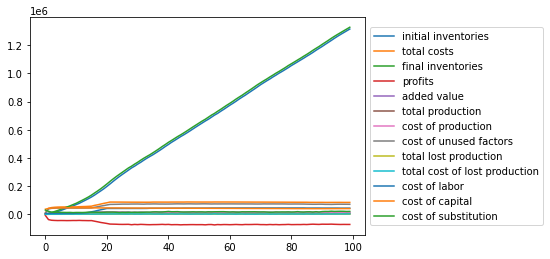

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

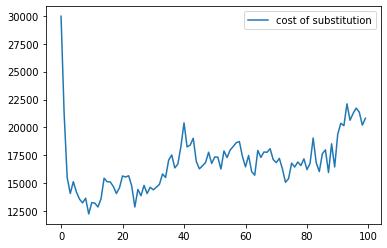

In [12]:
allFirmData[['cost of substitution']].plot()

<AxesSubplot: >

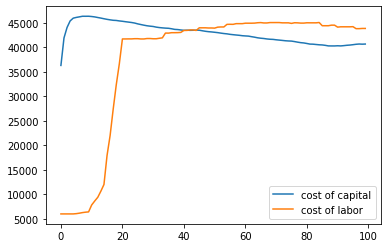

In [13]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [14]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [15]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 30 firms


In [16]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [17]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,3793.768405,660.4,-3133.368405,660.4,192.176777,564.0,3229.768405,21.661135,56.0,1983.0,14313.882621,11928.235518,30.0
1,0.0,660.4,16296.882621,2059.2,-14898.082621,1398.8,405.554954,1154.0,15142.882621,30.820174,78.0,1983.0,16371.030787,10530.979167,30.0
2,0.0,2059.2,18354.030787,3783.0,-16630.230787,1723.8,582.071961,1700.0,16654.030787,141.769548,374.0,1983.0,16959.749629,6624.325376,30.0
3,0.0,3783.0,18942.749629,6006.0,-16719.749629,2223.0,712.049119,2022.0,16920.749629,117.695624,312.0,1983.0,17315.584761,4732.168403,30.0
4,0.0,6006.0,19298.584761,8795.8,-16508.784761,2789.8,873.538032,2382.0,16916.584761,91.141590,236.0,1983.0,17622.774495,6124.586539,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,334929.4,29177.643716,338715.0,-25392.043716,3785.6,1261.929196,3490.0,25687.643716,209.293457,578.0,14207.0,15213.844190,9177.684377,30.0
96,0.0,338715.0,29420.844190,341816.8,-26319.044190,3101.8,1205.410496,3386.0,26034.844190,380.930638,1000.0,13928.0,15260.577435,8861.322923,30.0
97,0.0,341816.8,29188.577435,344921.2,-26084.177435,3104.4,1170.852762,3308.0,25880.577435,352.112488,920.0,13928.0,15306.167803,8439.165599,30.0
98,0.0,344921.2,29234.167803,347529.0,-26626.367803,2607.8,1119.495014,3234.0,26000.167803,451.887866,1228.0,13928.0,15298.176077,8111.896642,30.0


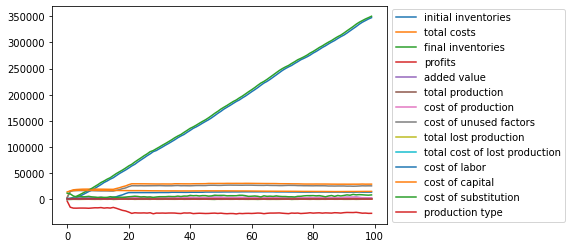

In [18]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

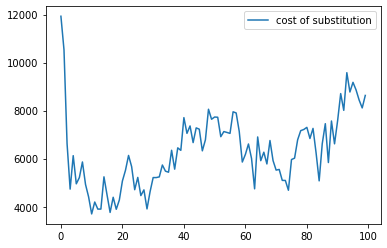

In [22]:
sumOfBalanceSheetSubset[['cost of substitution']].plot()

<AxesSubplot: >

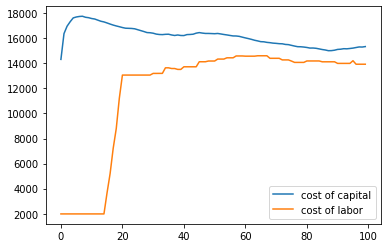

In [20]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [21]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000e+00,2496.750000,2.496750e+03
1,2.496750e+03,4879.516667,7.376267e+03
2,7.376267e+03,5861.566667,1.323783e+04
3,1.323783e+04,6752.633333,1.999047e+04
4,1.999047e+04,7252.133333,2.724260e+04
...,...,...,...
95,1.262549e+06,13292.016667,1.275841e+06
96,1.275841e+06,12829.608333,1.288670e+06
97,1.288670e+06,12907.716667,1.301578e+06
98,1.301578e+06,12769.950000,1.314348e+06
